In [1]:
from utils.data_prepare import load_text
train_text = load_text('data\origin\Train.txt')
test_text = load_text('data\origin\Test.txt')
label_list=['财经', '彩票', '房产', '股票', '家居', '教育', '科技', '社会', '时尚', '时政', '体育', '星座', '游戏', '娱乐']

In [2]:
train_labels = []
train_lengths = []
for line in train_text.split("\n"):
    label, label_name, content = line.split("\t")
    train_labels.append(eval(label))
    train_lengths.append(len(content))

test_lengths = []
for line in test_text.split("\n"):
    test_lengths.append(len(line))

In [3]:
import matplotlib.pyplot as plt
def plot_length(lengths, title = 'Sentence Length Distribution Histogram of Train Set'):
    """绘制长度分布图"""
    plt.hist(lengths, bins=range(min(lengths), max(lengths)+1), alpha=0.5, rwidth=0.8)
    plt.title(title)
    plt.xlabel('Sentence Length')
    plt.ylabel('Number')
    plt.show()

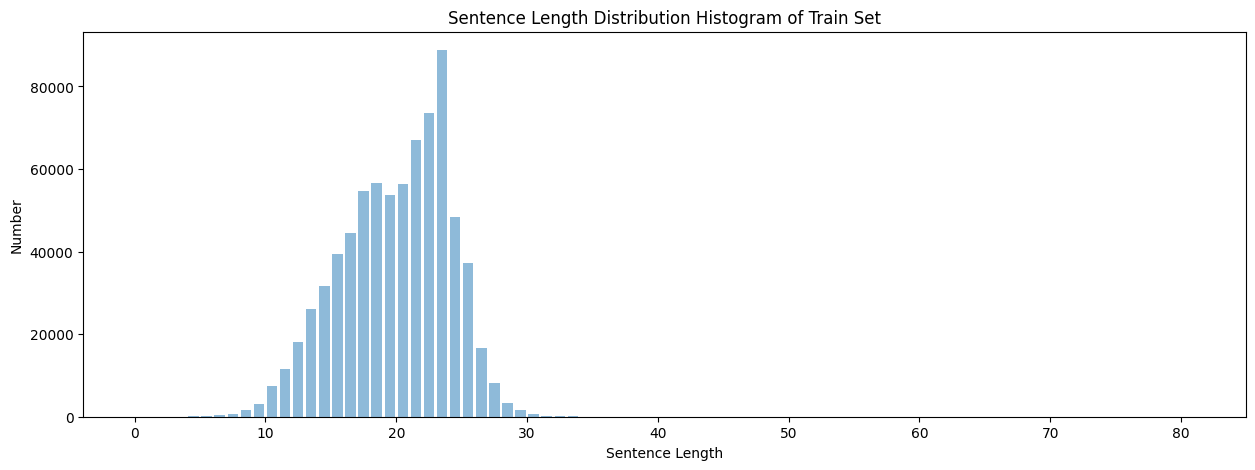

In [4]:
plt.figure(figsize=(15, 5))
plot_length(train_lengths)

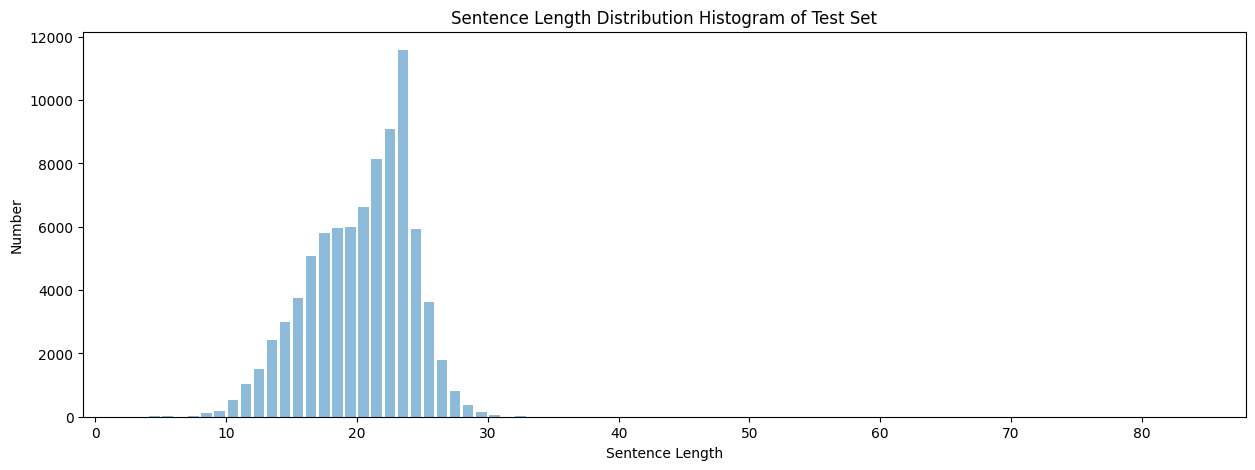

In [5]:
plt.figure(figsize=(15, 5))
plot_length(test_lengths, title = 'Sentence Length Distribution Histogram of Test Set')

In [6]:
import numpy as np
def show_info(train_lengths):
    """显示数据集信息"""
    train_lengths_np = np.array(train_lengths)
    print("数据集大小：", len(train_lengths_np))
    print("最小长度：", train_lengths_np.min())
    print("最大长度：", train_lengths_np.max())
    print("平均长度：", train_lengths_np.mean())
    print("中位数长度：", np.median(train_lengths_np))
    print("长度标准差：", train_lengths_np.std())

    max_len_3sigma = train_lengths_np.mean()+ 3 * train_lengths_np.std()
    max_len_2sigma = train_lengths_np.mean()+ 2 * train_lengths_np.std()
    max_len_1sigma = train_lengths_np.mean()+ 1 * train_lengths_np.std()

    print("3倍标准差长度：", max_len_3sigma)
    print("2倍标准差长度：", max_len_2sigma)
    print("1倍标准差长度：", max_len_1sigma)

    print("不超过3倍标准差长度占比：", len(train_lengths_np[train_lengths_np < max_len_3sigma])/len(train_lengths_np))
    print("不超过2倍标准差长度占比：", len(train_lengths_np[train_lengths_np < max_len_2sigma])/len(train_lengths_np))
    print("不超过1倍标准差长度占比：", len(train_lengths_np[train_lengths_np < max_len_1sigma])/len(train_lengths_np))

print("{}训练集长度信息{}".format("="*10, "="*10))
show_info(train_lengths)
print("{}测试集长度信息{}".format("="*10, "="*10))
show_info(test_lengths)

==========训练集长度信息==========
数据集大小： 752476
最小长度： 0
最大长度： 81
平均长度： 19.47185159393788
中位数长度： 20.0
长度标准差： 4.112582218401393
3倍标准差长度： 31.80959824914206
2倍标准差长度： 27.697016030740667
1倍标准差长度： 23.584433812339274
不超过3倍标准差长度占比： 0.9996411845693417
不超过2倍标准差长度占比： 0.9916954161993207
不超过1倍标准差长度占比： 0.8447193000175421
==========测试集长度信息==========
数据集大小： 83599
最小长度： 3
最大长度： 84
平均长度： 19.815021710786013
中位数长度： 20.0
长度标准差： 3.8838220764044356
3倍标准差长度： 31.46648793999932
2倍标准差长度： 27.582665863594883
1倍标准差长度： 23.698843787190448
不超过3倍标准差长度占比： 0.9994976016459527
不超过2倍标准差长度占比： 0.9927271857318868
不超过1倍标准差长度占比： 0.847342671563057


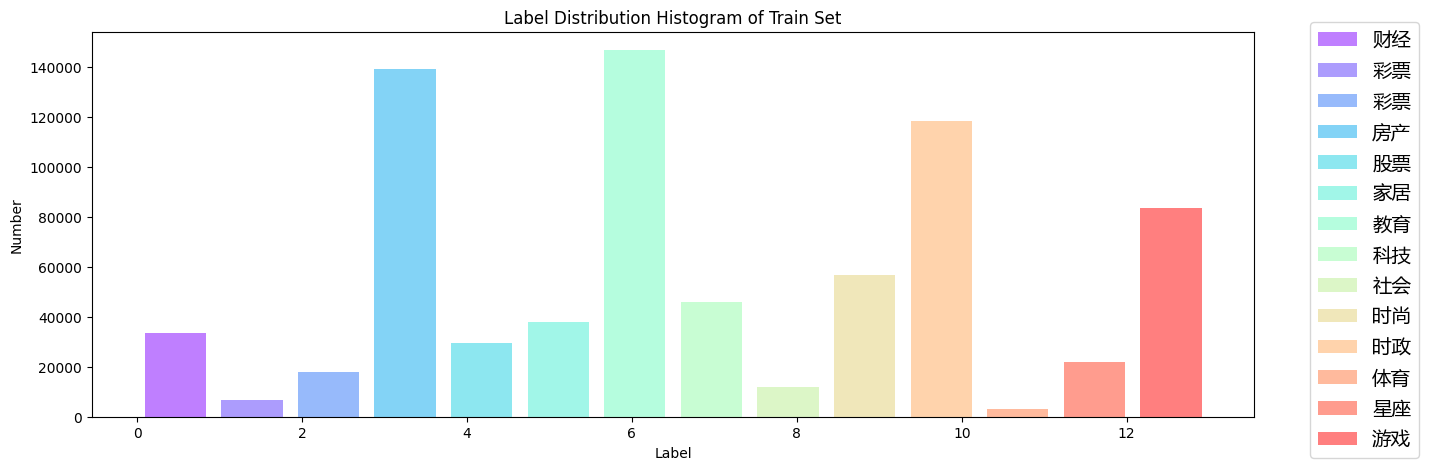

In [8]:
# 不同类别使用不同颜色
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
colors = cm.rainbow(np.linspace(0, 1, len(label_list)))

font = FontProperties(fname="./others/fonts/msyh.ttf", size=14)

# 画出各个类别的数量分布
def plot_label(labels):
    """绘制类别分布图"""
    values, bins, patches = plt.hist(labels, bins = len(label_list), alpha=0.5, rwidth=0.8)
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
        patch.set_label(label_list[int(patch.get_x())])
    plt.legend(prop=font, loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.title('Label Distribution Histogram of Train Set')
    plt.xlabel('Label')
    plt.ylabel('Number')
    plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

plt.figure(figsize=(15, 5))
plot_label(train_labels)